<a href="https://colab.research.google.com/github/SM-Sclass/DeepLearning/blob/main/Standardization%26Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df2 = df[['survived','pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [5]:
df3 = df2.fillna(df2.mean())

In [6]:
X = df3.drop("survived", axis=1)
Y= df3["survived"]
print('Shape of X = ', X.shape)
print('Shape of y =', Y.shape)

Shape of X =  (891, 3)
Shape of y = (891,)


In [14]:
X_train , X_test , y_train , y_test =train_test_split(X, Y, test_size=0.2, random_state=51)
X_train

,pclass,age,parch
770,3,24.000000,0
152,3,55.500000,0
731,3,11.000000,0
775,3,18.000000,0
324,3,29.699118,2
...,...,...,...
528,3,39.000000,0
709,3,29.699118,1
736,3,48.000000,3
485,3,29.699118,1


from matplotlib import pyplot as plt
X_train['pclass'].plot(kind='hist', bins=20, title='pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['parch'].plot(kind='hist', bins=20, title='parch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='pclass', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='age', y='parch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
X_train['pclass'].plot(kind='line', figsize=(8, 4), title='pclass')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
X_train['parch'].plot(kind='line', figsize=(8, 4), title='parch')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [10]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [11]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [12]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [16]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [17]:
X_train_sc = pd.DataFrame(X_train_sc, columns = ["pclass", 'age','parch' ])
X_test_sc = pd.DataFrame(X_test_sc, columns = ["pclass", 'age','parch' ])


In [20]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


In [21]:
mmc  = MinMaxScaler()
mmc.fit(X_train)

MinMaxScaler()

In [22]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)
X_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [23]:
X_train_mmc = pd.DataFrame(X_train_mmc, columns = ["pclass", 'age','parch' ])
X_test_mmc = pd.DataFrame(X_test_mmc, columns = ["pclass", 'age','parch' ])
X_train_mmc.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,0.653090,0.412781,0.078371
std,0.422326,0.184199,0.159407
min,0.000000,0.000000,0.000000
25%,0.375000,0.305752,0.000000
50%,1.000000,0.414836,0.000000
75%,1.000000,0.489940,0.000000
max,1.000000,1.000000,1.000000


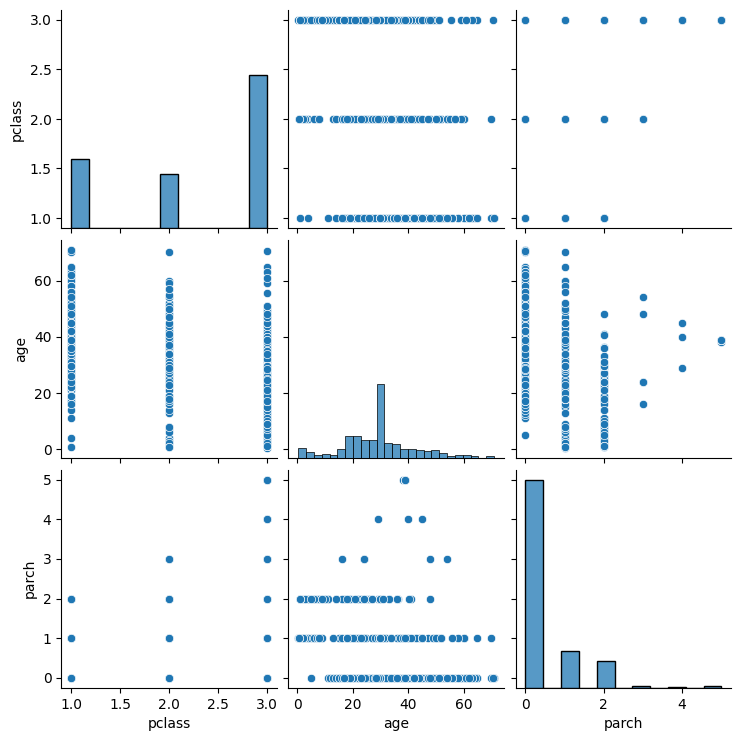

In [24]:
sns.pairplot(X_train)

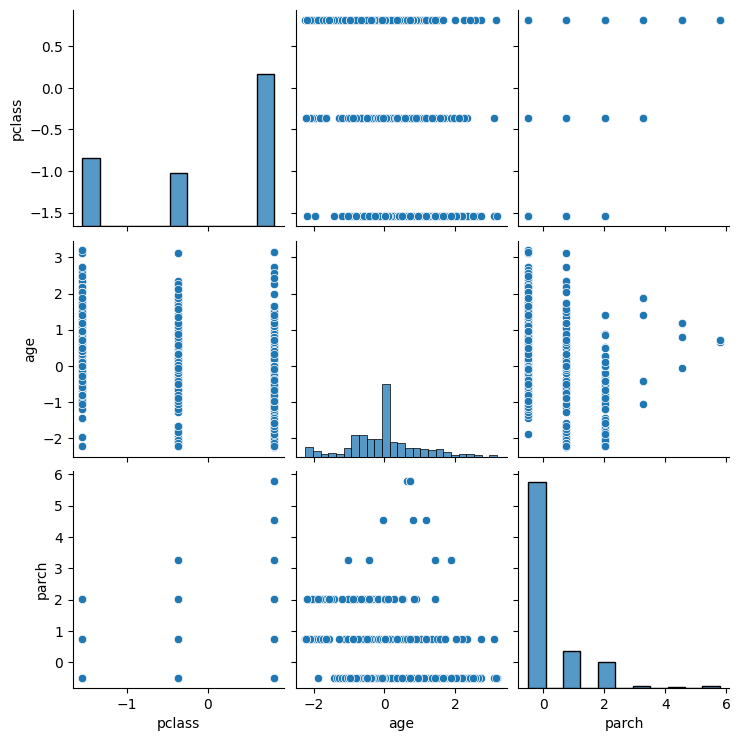

In [25]:
sns.pairplot(X_train_sc)

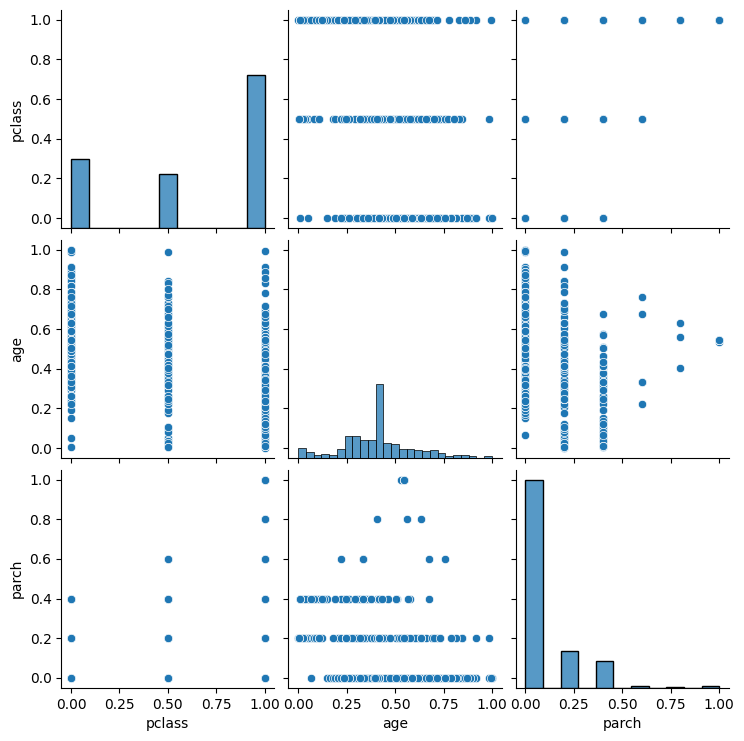

In [26]:
sns.pairplot(X_train_mmc)